<a href="https://colab.research.google.com/github/rahejamoni/Mohit-Raheja/blob/master/SLA_prediction_mine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SLA Prediction Model

### SLA for P3 tickets is not green from last 3 months therefore based on the historical data, we need a Ticket SLA predictoin model which will flag those tickets which has a potential to breah the SLA.

First write all the dependancy (pakages)

In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Step1 : Reading the dataset

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Train_data1.xlsx to Train_data1 (1).xlsx


In [0]:
train1 = pd.read_excel('Train_data1.xlsx')
train = train1


In [5]:
train.dtypes

Ticket ID                 object
Ticket Class              object
Description               object
Customer                  object
Internal Priority          int64
Status                    object
Owner Group               object
Owner                     object
CLASS DESCRIPTION         object
CLASSIFICATIONID          object
External System           object
Person.Location           object
PERSON.DEPARTMENT         object
Reported By               object
Affected Person           object
Accumulated Hold Time    float64
Reported Date            float64
Actual Finish            float64
Created By                object
First Call Resolution      int64
Changed By                object
E-mail                    object
Business Unit             object
Team                      object
Region                    object
Location                  object
Restore SLA               object
Duration1                float64
dtype: object

In [6]:
#train['Actual Finish']=train['Actual Finish'].astype("datetime64[ns]")
train.columns

Index(['Ticket ID', 'Ticket Class', 'Description', 'Customer',
       'Internal Priority', 'Status', 'Owner Group', 'Owner',
       'CLASS DESCRIPTION', 'CLASSIFICATIONID', 'External System',
       'Person.Location', 'PERSON.DEPARTMENT', 'Reported By',
       'Affected Person', 'Accumulated Hold Time', 'Reported Date',
       'Actual Finish', 'Created By', 'First Call Resolution', 'Changed By',
       'E-mail', 'Business Unit', 'Team', 'Region', 'Location', 'Restore SLA',
       'Duration1'],
      dtype='object')

In [0]:
#train["Reported Date"] = train["Reported Date"].astype()

#### Finding Missing values

In [0]:
# Missing Value Function
def missing_values(df):
    mis_val=df.isnull().sum() #Total missing values
    mis_percent=100*(df.isnull().sum()/len(df)) #Percentage of missing values
    mis_table=pd.concat([mis_val, mis_percent], axis=1) #Table of missing values
    mis_rename_col=mis_table.rename(columns= {0: 'Missing Values', 1: 'Percent'}) #Rename columns
    mis_rename_col=mis_rename_col[mis_rename_col.iloc[:,1]!=0].sort_values('Percent', ascending=False).round(1)#Sort table desc
    return mis_rename_col #return df with missing info

In [9]:
miss_values_train=missing_values(train)
#% of misssing value
print("Missing values found in below features")
miss_values_train

Missing values found in below features


,Missing Values,Percent
CLASS DESCRIPTION,6254,26.9
Person.Location,3000,12.9
PERSON.DEPARTMENT,1860,8.0
Location,1074,4.6
E-mail,27,0.1
CLASSIFICATIONID,22,0.1
Owner,14,0.1


#### Missing value presented via heatmap

#Missing values presented via heatmap


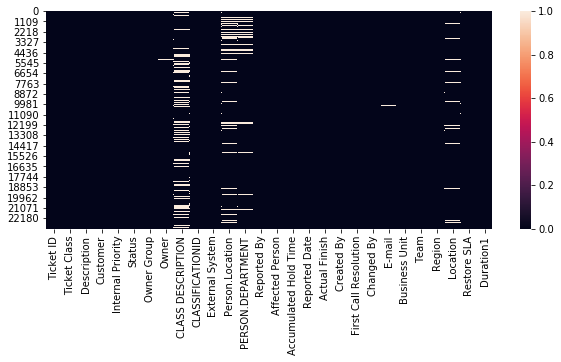

In [10]:
import seaborn as sns
plt.figure(figsize=(10,4))
sns.heatmap(train.isna())
print("#Missing values presented via heatmap")

In [11]:
train.columns

Index(['Ticket ID', 'Ticket Class', 'Description', 'Customer',
       'Internal Priority', 'Status', 'Owner Group', 'Owner',
       'CLASS DESCRIPTION', 'CLASSIFICATIONID', 'External System',
       'Person.Location', 'PERSON.DEPARTMENT', 'Reported By',
       'Affected Person', 'Accumulated Hold Time', 'Reported Date',
       'Actual Finish', 'Created By', 'First Call Resolution', 'Changed By',
       'E-mail', 'Business Unit', 'Team', 'Region', 'Location', 'Restore SLA',
       'Duration1'],
      dtype='object')

### unique values % (column wise)



In [12]:
#au = pd.unique(train["Ticket ID"])
col = []
for i in train.columns:
  un = len(pd.unique(train[i]))
  le = len(train[i])
  ag = un/le
  if ag >= .4:
    tt = str(ag)
    print(i+" "+tt)

Ticket ID 1.0
Description 0.6996950564789761
Affected Person 0.41029936004810375
Reported Date 0.9349740153760254
Actual Finish 0.9854400206159
Duration1 0.847313490529571


In [0]:
#train['Duration']=train['Actual Finish']- train['Reported Date']
train=train.drop(['Reported Date','Actual Finish'],axis=1)


### Droping few columns

In [0]:
train=train.drop(['Ticket ID','Description','Owner','CLASSIFICATIONID','Location','Status'], axis=1)

### Varaince for columns

In [15]:
aaa=train.var().sort_values()
aaa

Internal Priority           0.125058
First Call Resolution       0.154391
Duration1                 460.401651
Accumulated Hold Time    8163.543730
dtype: float64

In [16]:
train.describe(include="all")

,Ticket Class,Customer,Internal Priority,Owner Group,CLASS DESCRIPTION,External System,Person.Location,PERSON.DEPARTMENT,Reported By,Affected Person,Accumulated Hold Time,Created By,First Call Resolution,Changed By,E-mail,Business Unit,Team,Region,Restore SLA,Duration1
count,23283,23283,23283.000000,23283,17029,23283,20283,21423,23283,23283,23283.000000,23283,23283.000000,23283,23256,23283,23283,23283,23283,23283.000000
unique,2,1,NaN,116,324,8,1572,36,8647,9553,NaN,4347,NaN,448,8727,4,20,5,2,NaN
top,SR,WGC-00,NaN,I-MWS-XX-MSD-SDK-SERVCDESKGLBL,Application,SERVICECATALOG,Justice Mill Lane,ASEAAA,GENERIC.SWIVELDESK@WOODGROUP.COM,GENERIC.SWIVELDESK@WOODGROUP.COM,NaN,MASSIMO.PASCAZI1@IBM.COM,NaN,MAXADMIN,generic.swiveldesk@woodgroup.com,EAAA,Desktop,UNKNOWN,Within SLA,NaN
freq,18521,23283,NaN,7755,2578,8826,1881,10437,1687,1809,NaN,1593,NaN,15129,1660,10441,8270,19331,20074,NaN
mean,NaN,NaN,3.108362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.768492,NaN,0.190783,NaN,NaN,NaN,NaN,NaN,NaN,6.630143
std,NaN,NaN,0.353635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.352331,NaN,0.392927,NaN,NaN,NaN,NaN,NaN,NaN,21.456972
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.036834
50%,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.942488
75%,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.250000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.881128


#### Creating list of categorical vs continues features

In [0]:
all_col_train = set(train.describe(include='all').columns)
continues_col_train = set(train.describe().columns)
cat_col_train = all_col_train - continues_col_train
set_lable = set(['Ticket ID','Location','Created By','E-mail','Owner'])

#### Missing value treatment for catagorical features

In [0]:
for i in cat_col_train:
    train[i].fillna(str(train[i].mode()),inplace=True)

#### Checking if missing values still exsist after missing values treatment

In [19]:
print("any column have missing value")
train.isna().any()[lambda x: x]

any column have missing value


Series([], dtype: bool)

#### Converting few categorical features in string data type

In [0]:
train["E-mail"] = train["E-mail"].astype(str)
#train["CLASSIFICATIONID"] = train["CLASSIFICATIONID"].astype(str)
#train["Location"] = train["Location"].astype(str)
train["Internal Priority"] = train["Internal Priority"].astype('int32')

#### Converting categorical features into list data type
##### Note: label encoding works on list data type

In [0]:
# convert train data into list
categorical_feature_mask_train = train.dtypes==object# filter categorical columns using mask and turn it into a list
categorical_cols_train = train.columns[categorical_feature_mask_train].tolist()

#### Performing lable encoding

In [0]:
# import labelencoder 
from sklearn.preprocessing import LabelEncoder# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical columns # on Train Data
train[categorical_cols_train] = train[categorical_cols_train].apply(lambda col: le.fit_transform(col))

#### Exploratory Data Analysis

##### Histogram to see the distribution of all features

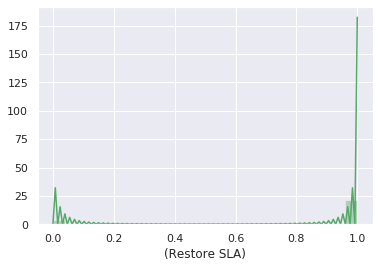

In [23]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
y_ = train['Restore SLA']
#Organize Data
SR_y = pd.Series(y_, name="(Restore SLA)")

#Plot Data
fig, ax = plt.subplots()
sns.distplot(SR_y, bins=25, color="g", ax=ax)
plt.show()

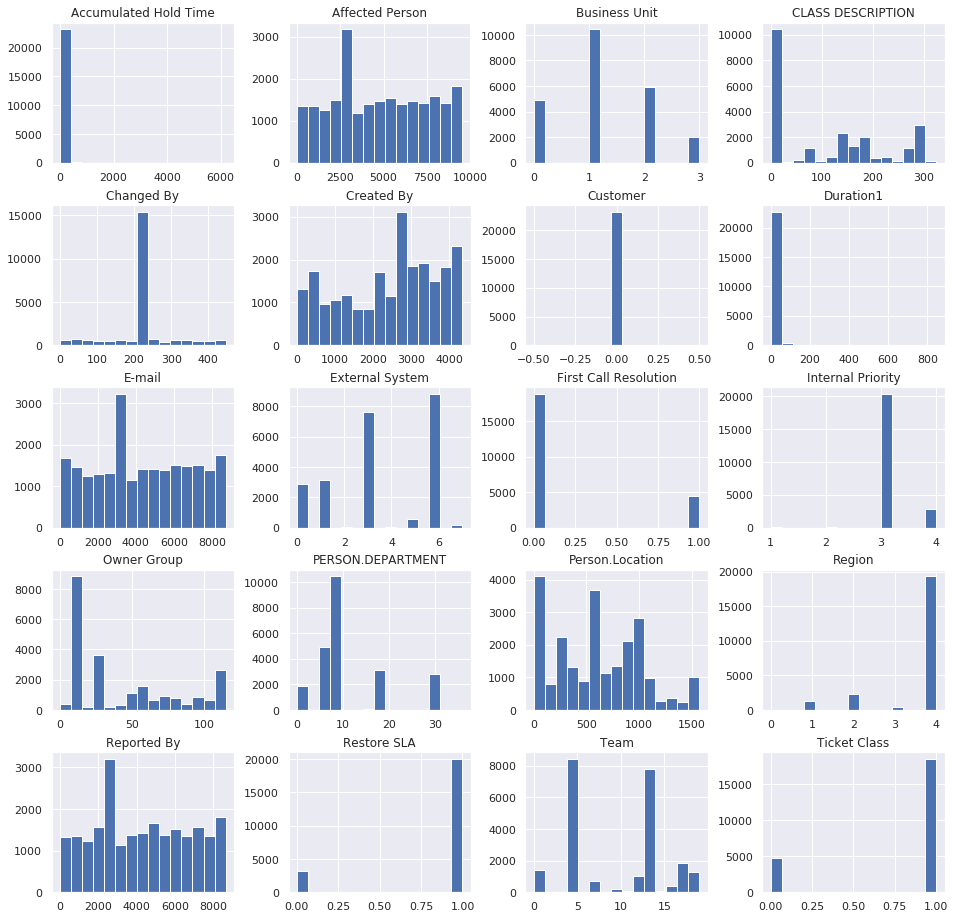

In [24]:
train.hist(bins=15, figsize=(16, 16));


Correlation matrix for each feature w.r.t target variable

In [25]:
correlation=train.corr()['Restore SLA'].sort_values() # Correlations with target
print('Ten most positive correlation: \n', correlation.tail(10))
print('Ten most negative correlation: \n', correlation.head(9))

Ten most positive correlation: 
 Region                  -0.001318
Person.Location          0.016958
Created By               0.024618
PERSON.DEPARTMENT        0.039783
Ticket Class             0.040364
CLASS DESCRIPTION        0.082052
Internal Priority        0.128155
First Call Resolution    0.181135
Restore SLA              1.000000
Customer                      NaN
Name: Restore SLA, dtype: float64
Ten most negative correlation: 
 Duration1               -0.472164
Accumulated Hold Time   -0.203160
External System         -0.147506
Business Unit           -0.069633
Changed By              -0.046154
Team                    -0.026783
E-mail                  -0.022199
Affected Person         -0.018456
Reported By             -0.015235
Name: Restore SLA, dtype: float64


# New data: following same steps for pre processing new data

In [38]:
import pandas as pd
from google.colab import files
up = files.upload()

Saving abc.xlsx to abc.xlsx


In [0]:
test1 = pd.read_excel('abc.xlsx')
test = test1

In [66]:
test.dtypes

Ticket ID                 object
Ticket Class              object
Description               object
Customer                  object
Internal Priority          int64
Status                    object
Owner Group               object
Owner                     object
CLASS DESCRIPTION         object
CLASSIFICATIONID          object
External System           object
Person.Location           object
PERSON.DEPARTMENT         object
Reported By               object
Affected Person           object
Accumulated Hold Time    float64
Reported Date            float64
Actual Finish            float64
Created By                object
First Call Resolution      int64
Changed By                object
E-mail                    object
Business Unit             object
Team                      object
Region                    object
Location                  object
Restore SLA               object
Duration1                float64
dtype: object

In [0]:
#test['Actual Finish']=test['Actual Finish'].astype("float64")
#test['Actual Finish'].head()

In [68]:
test.columns

Index(['Ticket ID', 'Ticket Class', 'Description', 'Customer',
       'Internal Priority', 'Status', 'Owner Group', 'Owner',
       'CLASS DESCRIPTION', 'CLASSIFICATIONID', 'External System',
       'Person.Location', 'PERSON.DEPARTMENT', 'Reported By',
       'Affected Person', 'Accumulated Hold Time', 'Reported Date',
       'Actual Finish', 'Created By', 'First Call Resolution', 'Changed By',
       'E-mail', 'Business Unit', 'Team', 'Region', 'Location', 'Restore SLA',
       'Duration1'],
      dtype='object')

In [0]:
all_col_test = set(test.describe(include='all').columns)
continues_col_test = set(test.describe().columns)
cat_col_test = all_col_test - continues_col_test
set_lable = set(['Ticket ID','Location','Created By','E-mail','Owner'])

In [0]:
for i in cat_col_test:
    test[i].fillna(str(test[i].mode()),inplace=True)

   

In [71]:
 print("any column have missing value")
 # checking if null value exsist
test.isna().any()[lambda x: x]

any column have missing value


Series([], dtype: bool)

In [72]:
len(test.columns)

28

In [0]:
#test['Duration']=test['Actual Finish']- test['Reported Date']


In [0]:
test=test.drop(['Reported Date','Actual Finish'],axis=1)

In [0]:
test=test.drop(['Ticket ID','Description','Owner','CLASSIFICATIONID','Location','Status'], axis=1)


In [0]:
#Converting few categorical features in string data type

test["E-mail"] = test["E-mail"].astype(str)
#test["CLASSIFICATIONID"] = test["CLASSIFICATIONID"].astype(str)
#test["Location"] = test["Location"].astype(str)
test["Internal Priority"] = test["Internal Priority"].astype('int32')

#Converting categorical features into list data type
#Note: label encoding works on list data type

# convert test data into list
categorical_feature_mask_test = test.dtypes==object# filter categorical columns using mask and turn it into a list
categorical_cols_test = test.columns[categorical_feature_mask_test].tolist()

#Performing lable encoding# import labelencoder 
from sklearn.preprocessing import LabelEncoder# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical columns # on test Data
test[categorical_cols_test] = test[categorical_cols_test].apply(lambda col: le.fit_transform(col))

In [0]:
ntest_y = test["Restore SLA"]
ntest_x = test.drop('Restore SLA',axis=1)

In [0]:
#scaling with test/new data
#Feature scalling via preprocessing.scale
from sklearn import preprocessing
# separate the data and target attributes
#NN = ntest_x

# standardize the data attributes
standardized_ntest_x = preprocessing.scale(ntest_x)

ntext_data = pd.DataFrame(standardized_ntest_x)


# continue with train data

#### Splitting data into train and test data sets

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Restore SLA',axis=1), 
                                                    train['Restore SLA'], test_size=0.2, random_state=101)

In [79]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(18626, 19) (4657, 19) (18626,) (4657,)


#### Performing standardization/Feature Scaling

In [0]:
#Feature scalling via preprocessing.scale
from sklearn import preprocessing
# separate the data and target attributes
XX = train

# standardize the data attributes
standardized_X_train = preprocessing.scale(X_train)
standardized_X_test = preprocessing.scale(X_test)
standardized_y_train = preprocessing.scale(y_train)
standardized_y_test = preprocessing.scale(y_test)

X_train_data = pd.DataFrame(standardized_X_train)
X_test_data = pd.DataFrame(standardized_X_test)
y_train_data = pd.DataFrame(standardized_y_train)
y_test_data = pd.DataFrame(standardized_y_test)

### Creating Decision Tree

In [0]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [82]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

print("Accuracy:",metrics.accuracy_score(y_test, y_pred).round(3))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred,normalize=False))

Accuracy: 0.937
Accuracy: 4365


### Creating confusion matrix to evaluate the results of Desicion Tree



Test Data Accuracy: 0.9373


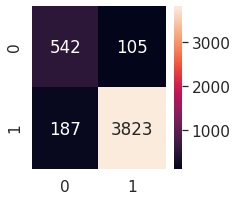

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

## EXTRA: Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (3,3))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))


In [0]:
# Predicting Test Set
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results_dt = pd.DataFrame([['DT', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [95]:
results_dt

,Model,Accuracy,Precision,Recall,F1 Score
0,DT,0.937299,0.973269,0.953367,0.963215


In [83]:
ntest_x.columns

Index(['Ticket Class', 'Customer', 'Internal Priority', 'Owner Group',
       'CLASS DESCRIPTION', 'External System', 'Person.Location',
       'PERSON.DEPARTMENT', 'Reported By', 'Affected Person',
       'Accumulated Hold Time', 'Created By', 'First Call Resolution',
       'Changed By', 'E-mail', 'Business Unit', 'Team', 'Region', 'Duration1'],
      dtype='object')

In [0]:
#ntest_x.head(2)

In [85]:
X_train.columns

Index(['Ticket Class', 'Customer', 'Internal Priority', 'Owner Group',
       'CLASS DESCRIPTION', 'External System', 'Person.Location',
       'PERSON.DEPARTMENT', 'Reported By', 'Affected Person',
       'Accumulated Hold Time', 'Created By', 'First Call Resolution',
       'Changed By', 'E-mail', 'Business Unit', 'Team', 'Region', 'Duration1'],
      dtype='object')

DT with new data 

In [0]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train.astype('int'))

#Predict the response for test dataset
y_prednew = clf.predict(ntest_x)



In [87]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

print("Accuracy:",metrics.accuracy_score(ntest_y, y_prednew).round(3))
print("Accuracy:",metrics.accuracy_score(ntest_y, y_prednew,normalize=False))

Accuracy: 0.831
Accuracy: 236


#confusiton matrix with new data

Test Data Accuracy: 0.9373


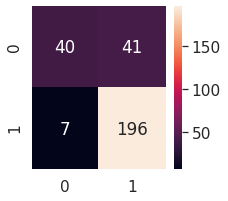

In [88]:
#confusiton matrix with new data
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

## EXTRA: Confusion Matrix
cm = confusion_matrix(ntest_y, y_prednew) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (3,3))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))


In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(ntest_y, y_prednew)
prec = precision_score(ntest_y, y_prednew)
rec = recall_score(ntest_y, y_prednew)
f1 = f1_score(ntest_y, y_prednew)

results_dt2 = pd.DataFrame([['DT2', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [96]:
results_dt,results_dt2

(  Model  Accuracy  Precision    Recall  F1 Score
 0    DT  0.937299   0.973269  0.953367  0.963215,
   Model  Accuracy  Precision    Recall  F1 Score
 0   DT2  0.830986   0.827004  0.965517  0.890909)

##### From Decision tree we have got 93% of accuracy with 95% of recall from base mode. When we tested the new data the results are different with 83% accuracy and 96% of recall.
Over all accuracy has reduced where as recall has increased.


In [0]:
#pre = pd.DataFrame(y_pred)
#act = pd.DataFrame(y_test)

In [0]:
#pre.nunique()
#act["Restore SLA"].value_counts(),pre[0].value_counts()

# we will use SMOTE to make the data balanced

In [97]:
# OVer Sampling
import warnings
warnings.filterwarnings('ignore')
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 16064
Before OverSampling, counts of label '0': 2562 

After OverSampling, the shape of train_X: (32128, 19)
After OverSampling, the shape of train_y: (32128,) 

After OverSampling, counts of label '1': 16064
After OverSampling, counts of label '0': 16064


# Creating Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
#                                   criterion = 'entropy')
classifier = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced_subsample',
                       criterion='entropy', max_depth=None, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

classifier.fit(X_train, y_train)
#classifier.fit(X_train_res, y_train_res)
#classifier.fit(X_train_miss,y_train_miss)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=None, max_features=10, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)

In [99]:
names = X_test.columns.values
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), classifier.feature_importances_), names), 
             reverse=True))

Features sorted by their score:
[(0.7021, 'Duration1'), (0.1138, 'Accumulated Hold Time'), (0.0454, 'Internal Priority'), (0.0301, 'First Call Resolution'), (0.0202, 'Owner Group'), (0.0147, 'CLASS DESCRIPTION'), (0.0146, 'Team'), (0.0099, 'External System'), (0.0079, 'Person.Location'), (0.0079, 'Created By'), (0.0072, 'E-mail'), (0.0069, 'Reported By'), (0.0068, 'Affected Person'), (0.0051, 'Changed By'), (0.003, 'PERSON.DEPARTMENT'), (0.0018, 'Business Unit'), (0.0016, 'Ticket Class'), (0.0011, 'Region'), (0.0, 'Customer')]


In [0]:
#from sklearn.metrics import classification_report
#print(classification_report(y_test,y_pred))

In [0]:
# Predicting Test Set
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['RF', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [102]:
 results_dt,results,

(  Model  Accuracy  Precision    Recall  F1 Score
 0    DT  0.937299   0.973269  0.953367  0.963215,
   Model  Accuracy  Precision    Recall  F1 Score
 0    RF  0.974232   0.990914  0.979052  0.984947)

### Random forest is giving better accuracy and precision %

Random forest with new data

In [0]:
# Predicting Test Set
y_predran = classifier.predict(ntest_x)


In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(ntest_y, y_predran)
prec = precision_score(ntest_y, y_predran)
rec = recall_score(ntest_y, y_predran)
f1 = f1_score(ntest_y, y_predran)

results_ran2 = pd.DataFrame([['RF2', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [110]:
results_ran2

,Model,Accuracy,Precision,Recall,F1 Score
0,RF2,0.84507,0.838298,0.970443,0.899543


In [58]:
#random forest

# Predicting Test Set
y_pred1 = classifier.predict(ntest_x)

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(ntest_y, y_pred1)
prec = precision_score(ntest_y, y_pred1)
rec = recall_score(ntest_y, y_pred1)
f1 = f1_score(ntest_y, y_pred1)

results = pd.DataFrame([['RF', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


TypeError: ignored

# K fold Validation

In [43]:
## K-fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X= X_train, y = y_train, scoring='roc_auc',
                             cv = 10,n_jobs=-1)
#print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))
print('Mean ROC AUC: %.3f' % (accuracies.mean()))

Mean ROC AUC: 0.996


In [0]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import random
import time

# GRID Search CV (Hyper Finituning)

In [0]:

# Round 1: Entropy
parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["entropy"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

In [43]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters  
print('Best Model:', grid_search.best_estimator_)

Best Model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=None, max_features=1, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)


In [44]:
# Round 2: Entropy
parameters = {"max_depth": [None],
              "max_features": [3, 5, 7],
              'min_samples_split': [8, 10, 12],
              'min_samples_leaf': [1, 2, 3],
              "bootstrap": [True],
              "criterion": ["entropy"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 157.22 seconds


In [0]:
#for i in train.columns:
 #   plt.hist(train[i],bins=10)
  #  plt.figure(figsize=(2,2))    
   # plt.show()
#test_sla['Restore SLA'].unique()
#train.dtypes #(to check the datatypeof each columns)

# New Test Data

In [134]:
from google.colab import files
uploaded = files.upload()

Saving New_data.xlsx to New_data (3).xlsx
